# 캐글의 소셜 네트워크 데이터셋을 활용한 영향력자 분석

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import gzip
import shutil

# 압축 해제할 .gz 파일 경로와 출력 파일 경로를 설정
input_gz_file = './data/facebook_combined.txt.gz'
output_file = './data/facebook_combined.txt'

# gzip 파일 압축 해제
with gzip.open(input_gz_file, 'rb') as gz_file:
    with open(output_file, 'wb') as out_file:
        shutil.copyfileobj(gz_file, out_file)

print(f"압축 해제 완료: {output_file}")

압축 해제 완료: ./data/facebook_combined.txt


In [4]:
# 1. 데이터 로드
edge_list = pd.read_csv('./data/facebook_combined.txt', sep=' ', header=None, names=['node1', 'node2'])
edge_list

,node1,node2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [5]:
# 2. 그래프 생성
G = nx.from_pandas_edgelist(edge_list, 'node1', 'node2')
G

In [7]:
# 3. 네트워크 분석
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
pagerank = nx.pagerank(G)

In [11]:
print('degree_centrality\n', degree_centrality)
print('betweenness_centrality\n', betweenness_centrality)
print('pagerank\n', pagerank)

degree_centrality
 {0: 0.08593363051015354, 1: 0.004210004952947003, 2: 0.0024764735017335313, 3: 0.004210004952947003, 4: 0.0024764735017335313, 5: 0.0032194155522535907, 6: 0.0014858841010401188, 7: 0.004952947003467063, 8: 0.001981178801386825, 9: 0.014115898959881128, 10: 0.0024764735017335313, 11: 0.00024764735017335313, 12: 0.00024764735017335313, 13: 0.007677067855373947, 14: 0.003714710252600297, 15: 0.00024764735017335313, 16: 0.002228826151560178, 17: 0.0032194155522535907, 18: 0.00024764735017335313, 19: 0.00396235760277365, 20: 0.003714710252600297, 21: 0.016097077761267953, 22: 0.0027241208519068845, 23: 0.004210004952947003, 24: 0.00396235760277365, 25: 0.017087667161961365, 26: 0.016840019811788013, 27: 0.0012382367508667657, 28: 0.0032194155522535907, 29: 0.0032194155522535907, 30: 0.004210004952947003, 31: 0.005695889053987122, 32: 0.0014858841010401188, 33: 0.0004952947003467063, 34: 0.0012382367508667657, 35: 0.0004952947003467063, 36: 0.0027241208519068845, 37: 0.00

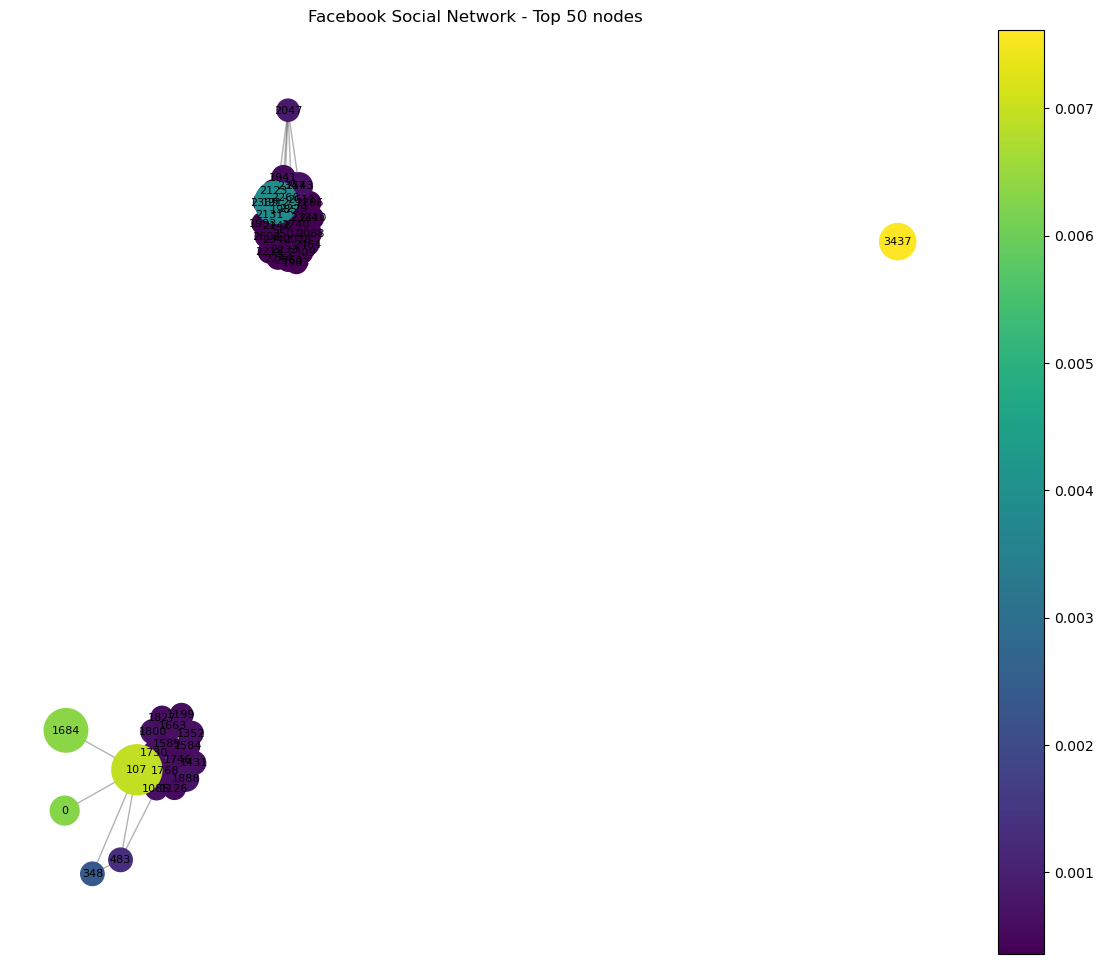

In [17]:
# 4. 시각화 (노드 수가 많으므로 상위 노드만 시각화)
top_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:50]
subgraph_nodes = [node for node, _ in top_nodes]
subgraph = G.subgraph(subgraph_nodes)

pos = nx.spring_layout(subgraph, seed=42)

node_size = [5000 * degree_centrality[node] for node in subgraph.nodes()]
node_color = [pagerank[node] for node in subgraph.nodes()]

plt.figure(figsize=(15, 12))
nx.draw_networkx_edges(subgraph, pos, alpha=0.3)
nodes = nx.draw_networkx_nodes(subgraph, pos, node_size=node_size, node_color=node_color, cmap=plt.cm.viridis)
nx.draw_networkx_labels(subgraph, pos, font_size=8)
plt.colorbar(nodes)
plt.title('Facebook Social Network - Top 50 nodes')
plt.axis('off')
plt.show()

In [13]:
# 5. 영향력자 리스트 출력
influencer_df = pd.DataFrame({
    'Node': list(G.nodes()),
    'Degree Centrality': [degree_centrality[node] for node in G.nodes()],
    'Betweenness Centrality': [betweenness_centrality[node] for node in G.nodes()],
    'PageRank': [pagerank[node] for node in G.nodes()]
})

print(influencer_df.sort_values(by='PageRank', ascending=False).head(10))

      Node  Degree Centrality  Betweenness Centrality  PageRank
1821  3437           0.135463                0.236115  0.007615
107    107           0.258791                0.480518  0.006936
351   1684           0.196137                0.337797  0.006367
0        0           0.085934                0.146306  0.006290
352   1912           0.186974                0.229295  0.003877
348    348           0.056711                0.037998  0.002348
1831   686           0.042100                0.029722  0.002219
1827  3980           0.014611                0.024820  0.002170
349    414           0.039376                0.047633  0.001800
1843   698           0.016840                0.115330  0.001317
